In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## load data

In [2]:
#### import out clean pickle file
trees = pd.read_pickle('./data/modified/trees_first_clean.pkl')

In [3]:
trees.head()

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,REMARQUES,ANNEEDEPLANTATION,RAISONDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
12,511,ESP10052,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,Arbre adulte,NaN,1970.0,NaN,Ville de Grenoble,5.716918,45.194803
15,15544,ESP27658,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,Arbre adulte,NaN,1970.0,NaN,Ville de Grenoble,5.716655,45.195170
16,26584,ESP11957,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Populus,alba,NaN,Arbre adulte,Penché,1970.0,NaN,Ville de Grenoble,5.716624,45.195246
18,41529,ESP39437,ESP174,Arbre d'espaces ouverts,ESP425,Ch Gordes Ouest conservatoire,4,Diospyros,kaki,NaN,Arbre jeune,NaN,2018.0,Nouveau,Ville de Grenoble,5.734082,45.173315
22,42381,ESP39683,ESP151,Arbre de voirie,ESP1343,R Frederico Garcia Lorca park,5,NaN,NaN,NaN,NaN,NaN,2016.0,Nouveau,Grenoble Alpes Métropole,5.734265,45.171728


In [4]:
trees.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'REMARQUES',
       'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'COLLECTIVITE', 'LONGITUDE',
       'LATITUDE'],
      dtype='object')

# make train test split

#### random split

In [5]:
year = trees.pop('ANNEEDEPLANTATION')

In [6]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(trees, year, random_state = 800)

In [28]:
y_train.shape

(22635,)

In [29]:
y_test.shape

(7545,)

#### Stratified shuffle - alternative (and very optional at this stage!)

In [13]:
trees

,ELEM_POINT_ID,CODE,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,CODE_PARENT_DESC,ADR_SECTEUR,GENRE_BOTA,ESPECE,VARIETE,STADEDEDEVELOPPEMENT,REMARQUES,RAISONDEPLANTATION,COLLECTIVITE,LONGITUDE,LATITUDE
12,511,ESP10052,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,Arbre adulte,NaN,NaN,Ville de Grenoble,5.716918,45.194803
15,15544,ESP27658,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Pinus,nigra,Austriaca,Arbre adulte,NaN,NaN,Ville de Grenoble,5.716655,45.195170
16,26584,ESP11957,ESP151,Arbre de voirie,ESP346,Bd Esplan Autoroute A 48,2,Populus,alba,NaN,Arbre adulte,Penché,NaN,Ville de Grenoble,5.716624,45.195246
18,41529,ESP39437,ESP174,Arbre d'espaces ouverts,ESP425,Ch Gordes Ouest conservatoire,4,Diospyros,kaki,NaN,Arbre jeune,NaN,Nouveau,Ville de Grenoble,5.734082,45.173315
22,42381,ESP39683,ESP151,Arbre de voirie,ESP1343,R Frederico Garcia Lorca park,5,NaN,NaN,NaN,NaN,NaN,Nouveau,Grenoble Alpes Métropole,5.734265,45.171728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31613,1576,ESP27818,ESP174,Arbre d'espaces ouverts,ESP1345,R L Jouhaux dev lycée Argouges,5,Fraxinus,excelsior,NaN,Arbre jeune,NaN,NaN,Grenoble Alpes Métropole,5.745005,45.175206
31614,1579,ESP27819,ESP174,Arbre d'espaces ouverts,ESP625,R M Riollet cité rouge,5,Acer,platanoides,Schwedleri nigra,Arbre adulte,NaN,NaN,Ville de Grenoble,5.748964,45.177531
31615,1585,ESP27820,ESP151,Arbre de voirie,ESP148,R G Tonnelier Cocat Fernandat,5,Platanus,hispanica,NaN,Arbre adulte,NaN,NaN,Ville de Grenoble,5.743514,45.171506
31616,1588,ESP27821,ESP151,Arbre de voirie,ESP389,R Manteyer des J O à Ravanat,5,Fraxinus,angustifolia,Raywood,Arbre jeune,NaN,NaN,Grenoble Alpes Métropole,5.743294,45.173542


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split  =StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 800)

In [11]:
#### we can see that StratifiedShuffleSplit is a generator object which means we can loop over it
split.split(trees, year , trees['ADR_SECTEUR'])

<generator object BaseShuffleSplit.split at 0x0000021DF298DD40>

In [21]:
for train_index, test_index in split.split(trees, year):# , trees[['ADR_SECTEUR','STADEDEDEVELOPPEMENT']]):
#     print(train_index)
    X_train = trees.iloc[train_index]
    X_test = trees.iloc[test_index]  
    y_train = year.iloc[train_index]
    y_test = year.iloc[test_index]

The proportions we find look consistent between splits, which is what we wanted...

In [13]:
trees.ADR_SECTEUR.value_counts()/trees.shape[0]

6    0.226508
5    0.219848
2    0.196687
3    0.137243
4    0.123161
1    0.096554
Name: ADR_SECTEUR, dtype: float64

In [14]:
X_test.ADR_SECTEUR.value_counts()/X_test.shape[0]

5    0.222797
6    0.222266
2    0.192843
3    0.136514
4    0.122465
1    0.103115
Name: ADR_SECTEUR, dtype: float64

# basic stats

Should usually only be done after the split!! We dont want to even see our y_test data if we can avoid it, otherwise we may bias our final model and it wont generalise well.

In [15]:
train = pd.concat([X_train, y_train], axis=1).copy()

In [16]:
train.describe()

,ELEM_POINT_ID,ADR_SECTEUR,LONGITUDE,LATITUDE,ANNEEDEPLANTATION
count,22635.000000,22635.000000,22635.000000,22635.000000,22635.000000
mean,18547.685222,3.858184,5.727645,45.177119,1989.380738
std,11222.360368,1.699773,0.012781,0.011936,17.372285
min,1.000000,1.000000,5.697915,45.151572,1900.000000
25%,9050.000000,2.000000,5.717994,45.166209,1975.000000
50%,18066.000000,4.000000,5.730115,45.175734,1985.000000
75%,27112.000000,5.000000,5.737522,45.187052,2004.000000
max,44305.000000,6.000000,5.798704,45.224825,2021.000000


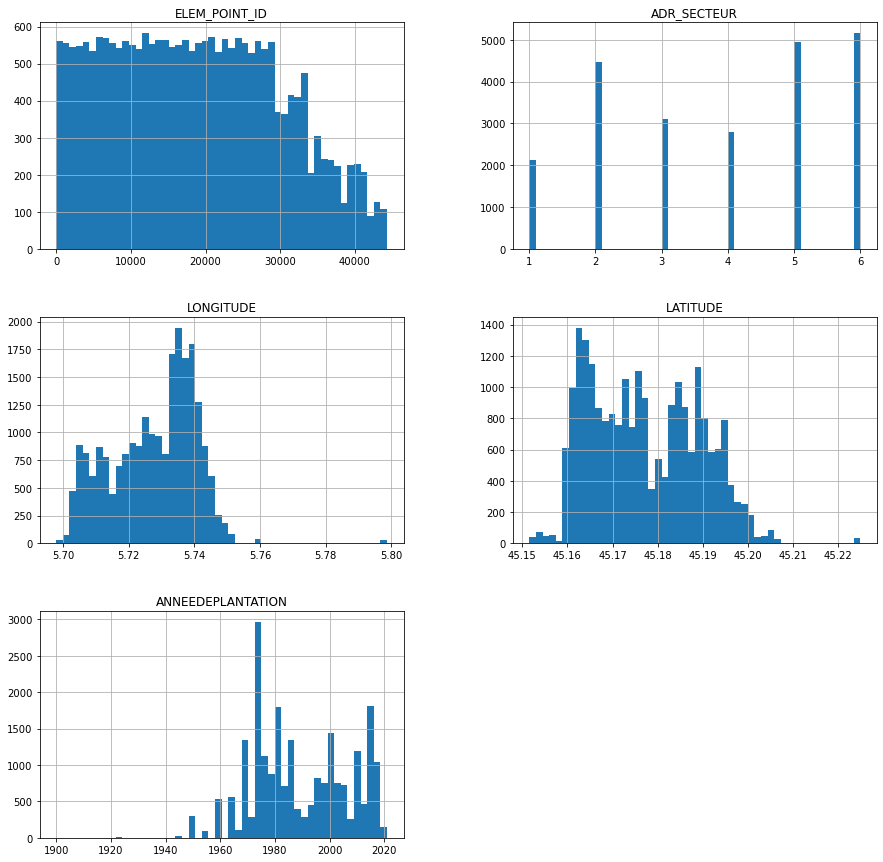

In [17]:
train.hist(bins=50, figsize = (15,15));

In [18]:
train.isnull().sum()

ELEM_POINT_ID               0
CODE                        0
SOUS_CATEGORIE              0
SOUS_CATEGORIE_DESC         0
CODE_PARENT                 0
CODE_PARENT_DESC            0
ADR_SECTEUR                 0
GENRE_BOTA                 25
ESPECE                   1128
VARIETE                 19302
STADEDEDEVELOPPEMENT     1337
REMARQUES               18712
RAISONDEPLANTATION      20466
COLLECTIVITE                0
LONGITUDE                   0
LATITUDE                    0
ANNEEDEPLANTATION           0
dtype: int64

## Basic vis that might give us some insight into the problem

Again only on training split data!

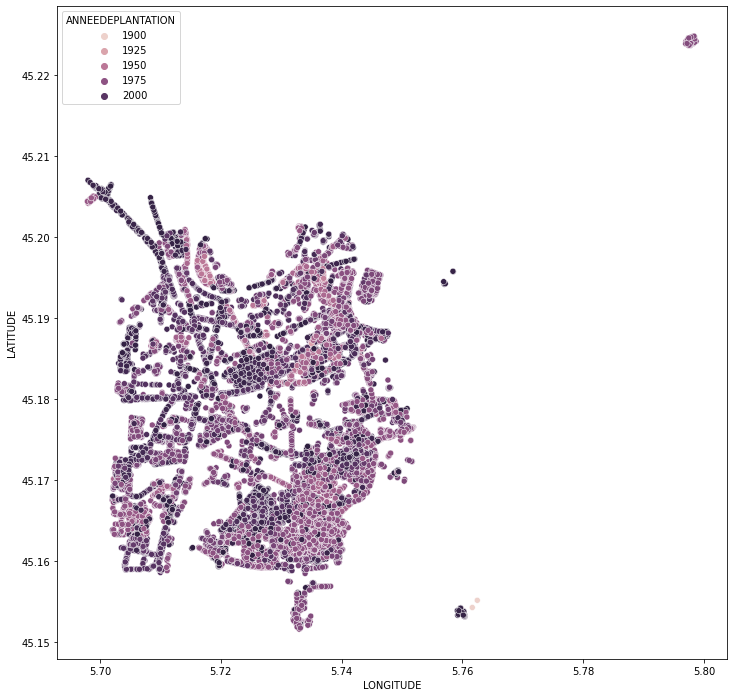

In [19]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ANNEEDEPLANTATION",
                     data=train, ax=ax, );

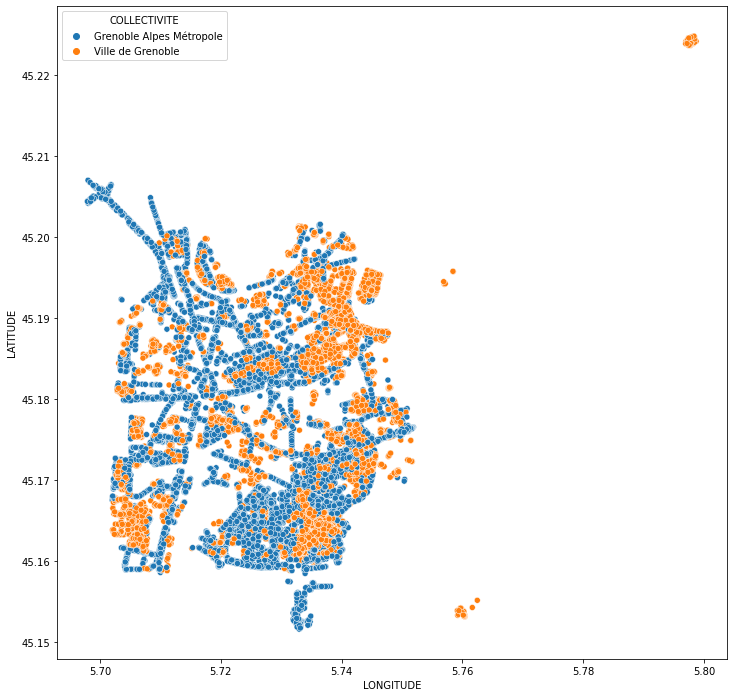

In [20]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="COLLECTIVITE",
                     data=train, ax=ax);

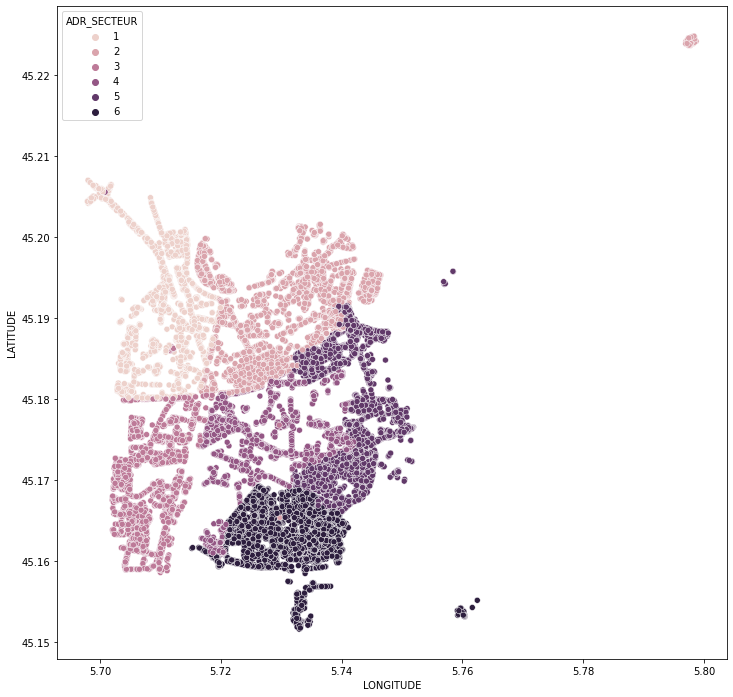

In [21]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE", hue="ADR_SECTEUR",
                     data=train, ax=ax);

In [22]:
train.columns

Index(['ELEM_POINT_ID', 'CODE', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC',
       'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'GENRE_BOTA',
       'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'REMARQUES',
       'RAISONDEPLANTATION', 'COLLECTIVITE', 'LONGITUDE', 'LATITUDE',
       'ANNEEDEPLANTATION'],
      dtype='object')

Replace STADEDEDEVELOPPEMENT with numerical values for plotting

In [23]:
train.STADEDEDEVELOPPEMENT.value_counts()

Arbre adulte          16142
Arbre jeune            4975
Arbre vieillissant      181
Name: STADEDEDEVELOPPEMENT, dtype: int64

In [24]:
development_mappings = {"Arbre jeune": 1, "Arbre adulte": 2, "Arbre vieillissant": 3}
train = train.replace({'STADEDEDEVELOPPEMENT': development_mappings})
train.STADEDEDEVELOPPEMENT.value_counts()

2.0    16142
1.0     4975
3.0      181
Name: STADEDEDEVELOPPEMENT, dtype: int64

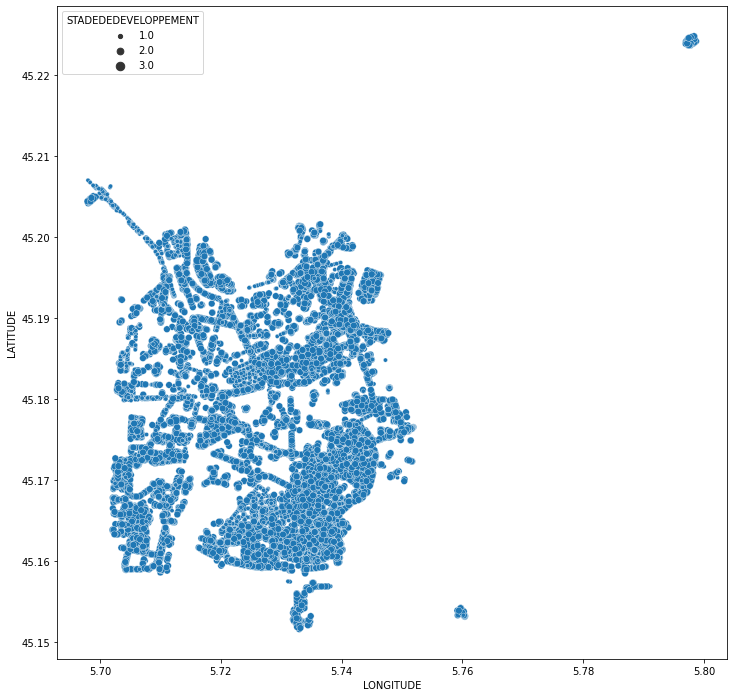

In [25]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE",
                #hue="ANNEEDEPLANTATION",
                size="STADEDEDEVELOPPEMENT",alpha='auto',
                data=train, ax=ax, size_order=[0.1,50,1000], palette='jet', legend='full');

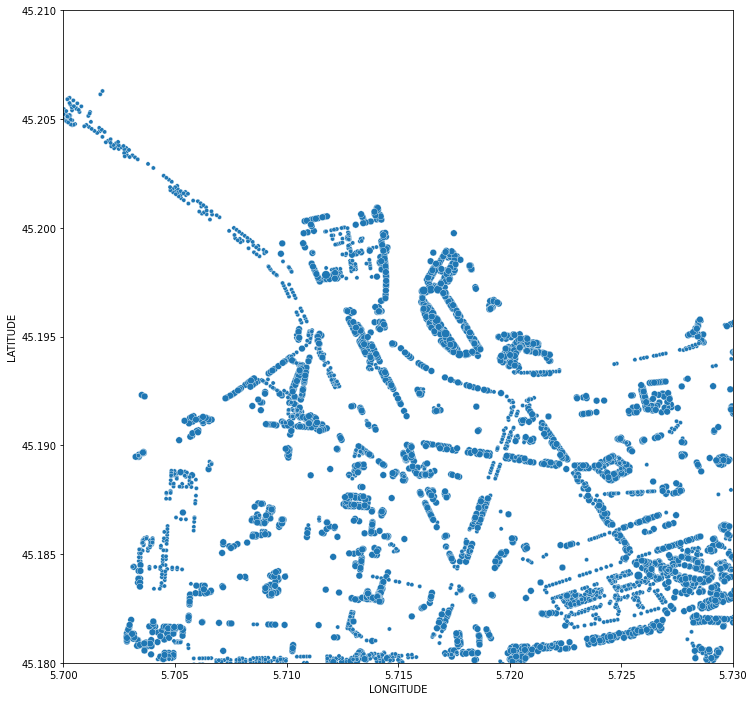

In [26]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(x="LONGITUDE", y="LATITUDE",
                #hue="ANNEEDEPLANTATION",
                size="STADEDEDEVELOPPEMENT",alpha='auto',
                data=train, ax=ax,size_order=[0.1,50,1000],  palette='jet', legend=False,);

ax.set(xlim=(5.7, 5.73), ylim=(45.18, 45.21));

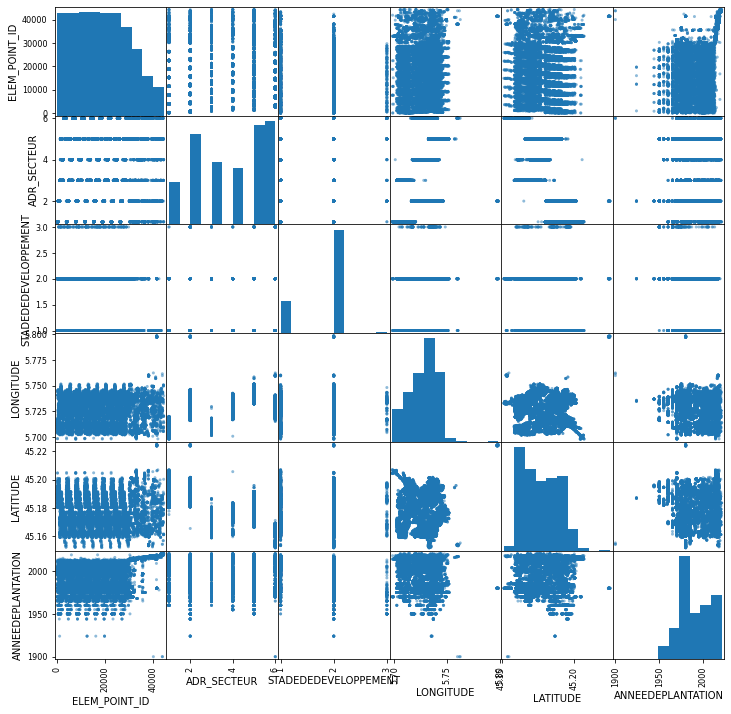

In [27]:
pd.plotting.scatter_matrix(train, figsize=(12,12));

# Naive model
Used as a baseline model to know later if our ML models are useful. Here based on average tree age in X_test.

In [28]:
y_train.median()

1985.0

In [29]:
X_test.shape

(7545, 16)

In [30]:
y_test_pred = np.ones(len(X_test)) * y_train.median()

In [31]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_test_pred)
print('Root mean squared error: ', np.sqrt(mse))

Root mean squared error:  17.921106836498563


# Prepare data - using transformation pipelines

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


### make pipelines for numerical and catageorical data

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

In [30]:
num_attribs = ['LONGITUDE', 'LATITUDE']
cat_attribs = ["ADR_SECTEUR", 'COLLECTIVITE', 'STADEDEDEVELOPPEMENT'] # adding , 'GENRE_BOTA' here create many more columns which might cause problems. Leaving out for now.

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

Check if pipelines creating expected shape

In [18]:
catT = cat_pipeline.fit_transform(X_train[cat_attribs])
# catT.shape

c:\Users\vince\anaconda3\envs\ML1\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [36]:
catT

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [37]:
numT = num_pipeline.fit_transform(X_train[num_attribs])
numT.shape

(22635, 2)

### transform the data using full pipeline

In [37]:
num_attribs, cat_attribs

(['LONGITUDE', 'LATITUDE'],
 ['ADR_SECTEUR', 'COLLECTIVITE', 'STADEDEDEVELOPPEMENT'])

In [31]:
from sklearn.pipeline import FeatureUnion

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_pipeline", cat_pipeline, cat_attribs),
    ])

X_trainT = pd.DataFrame(full_pipeline.   )

c:\Users\vince\anaconda3\envs\ML1\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [33]:
X_trainT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.906393,-0.454742,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.387278,1.169028,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.154032,-0.776798,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.480421,-0.738496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.564153,-0.809292,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [34]:
X_trainT.shape # quick check for shape -> yes,  13 columns is what we expect

(22635, 13)

Do the same to test data, just to ensure that there are no problems pre-modelling.

In [ ]:
X = df.drop["anneedeplantation"]
y = df["anneedeplantation"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_testT = full_pipeline.transform(X_test) 

In [42]:
X_testT.shape

(7545, 13)

# model build

### linear regression

build linear regresion module and estimate test error using cross validation.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin_reg = LinearRegression()

scores = cross_val_score(lin_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=10)
pd.Series(np.sqrt(-scores)).describe()


count    10.000000
mean     15.285580
std       0.302336
min      14.779727
25%      15.224148
50%      15.296369
75%      15.418178
max      15.798892
dtype: float64

Great this is better than the naive model. Still not great though.

### Decision tree regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)


scores = cross_val_score(tree_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=10)
print('Cross validation results')
pd.Series(np.sqrt(-scores)).describe()


Cross validation results


count    10.000000
mean     11.498960
std       0.238666
min      11.095456
25%      11.337040
50%      11.525342
75%      11.652248
max      11.879883
dtype: float64

This is an another improvement!

### random forest - with small no of trees

In [45]:
X_trainT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.025979,-0.894875,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.367202,-1.267133,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,-0.326040,0.498808,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-1.626049,-0.268363,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.172421,1.213061,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
from sklearn.ensemble import RandomForestRegressor

#forest_reg = RandomForestRegressor(n_estimators=4, max_features=8)#, random_state=42)
forest_reg = RandomForestRegressor(max_depth = 30)#, random_state=42)

print('Cross validation results')
scores = cross_val_score(forest_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=10)
pd.Series(np.sqrt(-scores)).describe()

Cross validation results


count    10.000000
mean      9.024607
std       0.167313
min       8.670370
25%       8.981766
50%       9.072936
75%       9.117339
max       9.250729
dtype: float64

### svm 

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="rbf")

print('Cross validation results')
scores = cross_val_score(svm_reg, X_trainT, y_train, scoring='neg_mean_squared_error', cv=2)
pd.Series(np.sqrt(-scores)).describe()


Forests look promising! Lets try to find better hyperparameters.

## Cross validation

We should use CV to get a better estimate of what will happen on testing set (we could be overfitting if we only fit and evaluate on the train).

We can also use it to choose the best hyperparameters for promising models....this is what we do now!

#### Tuning models

Forest looks promising. Lets search to find better hyper parameters with CV.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try two different searches
    {'n_estimators': [3, 10, 30, 100], 'max_features': [2, 4, 6, 8, 'auto']},

    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()#random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=False)
grid_search.fit(X_trainT, y_train)

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results[results.rank_test_score == 1]

In [ ]:
np.sqrt(-results[results.rank_test_score == 1][['mean_test_score']])

This is a slight improvement. To ensure that our CV evaluations are correct lets take a look at the test set with this final model we have found! (finally)

# evaluate on test set

If we choose this as our final model (and it's performance is good enough to put into production!) then we do a final evaluation on the test set to assure that it is likely to perform well once we move to put it into production.

In [ ]:
estimator = grid_search.best_estimator_

In [ ]:
X_testT = full_pipeline.transform(X_test)

tuned_forest_preds = estimator.predict(X_testT)
tuned_forest_mse = mean_squared_error(y_test, tuned_forest_preds)

print('Root mean squared error: ', np.sqrt(tuned_forest_mse))


Conclusion: This is not far from our CV evaluation so we conclude that this is approximately how we expect our model to perform in the real world. 

The final model is much better model than the naive and linear models. Although finally depends on the users (tree keepers of Grenoble) whether it is useful or not!

It is possible we could use some of the other X data that was removed or not uncluded, or transform futher/combine some of these X varaibles to improve the model further.